In [1]:
import requests
from bs4 import BeautifulSoup

URL = "https://www.michaelmauboussin.com/writing"

response = requests.get(URL)
soup = BeautifulSoup(response.text, 'html.parser')

In [6]:
data = soup.find_all(class_="sqs-html-content")[-2]
print(data)

<div class="sqs-html-content">
<ul data-rte-list="default"><li><pre><code><a href="https://mjbaldbard.files.wordpress.com/2020/09/michael-mauboussin-e28093-research-articles-and-interviews-1995-2004.pdf">Research, Articles and Interviews (1995-2004)</a> </code></pre></li><li><pre><code><a href="https://mjbaldbard.files.wordpress.com/2020/09/michael-mauboussin-e28093-research-articles-and-interviews-2005-2011.pdf">Research, Articles and Interviews (2005-2011)</a> </code></pre></li><li><pre><code><a href="https://mjbaldbard.files.wordpress.com/2020/09/michael-mauboussin-e28093-research-articles-and-interviews-2012-2013.pdf">Research, Articles and Interviews (2012-2013)</a> </code></pre></li><li><pre><code><a href="https://mjbaldbard.files.wordpress.com/2020/09/michael-mauboussin-e28093-research-articles-and-interviews-2014.pdf">Research, Articles and Interviews (2014)</a> </code></pre></li><li><pre><code><a href="https://mjbaldbard.files.wordpress.com/2020/09/michael-mauboussin-e28093-ba

In [15]:
type(data.find_all('a')[1])

bs4.element.Tag

In [17]:
data.find_all('a')[1].text

'Research, Articles and Interviews (2005-2011)'

In [ ]:
# https://www.morganstanley.com/im/publication/insights/articles/article_chartsfromthevaultpicturestoponder.pdf?1736712102328
# https://www.morganstanley.com/im/publication/insights/articles/article_measuringthemoat.pdf?1736712206119

In [ ]:
# col-md-8 col-sm-12 col-xs-12

In [1]:
from selenium import webdriver
from webdriver_manager.chrome import ChromeDriverManager
from selenium.webdriver.chrome.service import Service
from selenium.webdriver.common.by import By

driver = webdriver.Chrome(service=Service(ChromeDriverManager().install()))

In [2]:
type(driver)

selenium.webdriver.chrome.webdriver.WebDriver

In [3]:
URL = "https://www.morganstanley.com/im/en-us/financial-advisor/insights/series/consilient-observer.html"

driver.get(URL)

In [4]:
driver.maximize_window()

In [6]:
driver.close()

In [46]:
# Get all article links
articles = driver.find_elements(By.CSS_SELECTOR, ".series-detail-articles a")

# Create a set to track unique URLs
seen_urls = set()

for article in articles:
    url = article.get_attribute('href')
    # Only open if we haven't seen this URL before
    if url not in seen_urls:
        # Open in new tab using JavaScript since it handles dynamic content better
        driver.execute_script("window.open(arguments[0], '_blank');", url)
        seen_urls.add(url)

In [48]:
# Switch to each tab and close it
tabs = driver.window_handles
driver.switch_to.window(driver.window_handles[0])
driver.close()

In [49]:
driver.switch_to.window(driver.window_handles[0])

In [29]:
from bs4 import BeautifulSoup

driver.switch_to.window(driver.window_handles[0])
html = driver.page_source
soup = BeautifulSoup(html, 'html.parser')

In [28]:
driver.window_handles[0]

'76B659795C15F8ECC93B148B2105F08A'

In [31]:
DATE_CLASS = "insightHeaderTextRegular text-uppercase customColor insightDateColor"
TITLE_CLASS = "heroProductName equalSpace noMargin customColor"

print(soup.find(class_=DATE_CLASS).text.strip())
print(soup.find(class_=TITLE_CLASS).text.strip())

May 20, 2020
Myth Busting, Popular Delusions, and the Variant Perception


In [32]:
print(soup.find(class_="blockText").text.strip())

We address four myths or popular delusions in the investment industry:

Short-termism is rampant and deleterious: We hear this argument made a lot but often without concrete evidence, so we critically examine some of the claims to see if they hold up;
Dividends play a large role in equity returns over time: We show that price appreciation is the only source of investment return that increases accumulated capital;
Investing in money-losing companies is a bad idea: This is too simplistic, as some money-losing companies may still have attractive economics; and
The rise of indexing has made it easier to be an active manager: If the investors who have turned to indexing tend to be less skillful, the remaining investors are left competing against stronger competition, making it harder to generate alpha.


In [39]:
PDF_CLASS = "buttoncomponent left custom-btn btn btn-default btn-lg"
driver.switch_to.window(driver.window_handles[0])
pdf_link = driver.find_element(By.CLASS_NAME, PDF_CLASS.replace(" ", "."))

In [41]:
pdf_link.get_attribute("href")

'https://www.morganstanley.com/im/publication/insights/articles/article_mythbustingpopulardelusions_en.pdf?1736836675831'

In [2]:
import zenml

!zenml init

⠋ Initializing ZenML repository at 
/Users/athekunal/Desktop/LLM-Engineering/Michael-J.-Mauboussin-Twin/src.
Setting the repo active workspace to 'default'.
Setting the repo active stack to default.
ZenML repository initialized at 
/Users/athekunal/Desktop/LLM-Engineering/Michael-J.-Mauboussin-Twin/src.
⠋ Initializing ZenML repository at 
/Users/athekunal/Desktop/LLM-Engineering/Michael-J.-Mauboussin-Twin/src.
⠋ Initializing ZenML repository at 
/Users/athekunal/Desktop/LLM-Engineering/Michael-J.-Mauboussin-Twin/src.

The local active stack was initialized to 'default'. This local configuration 
will only take effect when you're running ZenML from the initialized repository 
root, or from a subdirectory. For more information on repositories and 
configurations, please visit 
https://docs.zenml.io/user-guide/production-guide/understand-stacks.


In [2]:
# from michael_mauboussin_twin.feature.extract import extract_data

# o = extract_data.extraction_data()
# o[0]

## DATABASE

Today's aim

1. Test the vector store for vision model
2. Docling for the text model
3. Test the vector store for text model
4. See how you can use Qdrant cloud to store the vector db
5. PoC pipeline with text and vision model with streamlit and then proper UI/UX

## VALIDATING THE VISION MODEL

In [18]:
%load_ext autoreload
%autoreload 2

In [1]:
import os

os.chdir("..")

In [2]:
import os

os.environ["CUDA_VISIBLE_DEVICES"] = "0"

In [3]:
from michael_mauboussin_twin.transform import vision_db, settings

vectors_config, quantization_config, optimizers_config = settings.get_default_multi_vector_config(vector_size=1024)
vision_db_model = vision_db.VisionVectorStore.from_pretrained(
    settings.VisionEmbeddingModel(),
    settings.DBSettings(VISION_EMBEDDING_MODEL_PARAMS=settings.VisionEmbeddingModel()),
    qdrant_settings=settings.QdrantSettings(vector_params=vectors_config, scalar_params=quantization_config, optimizers_config=optimizers_config),
)

/home/recoverx/astarag/mj_project/Michael-J.-Mauboussin-Twin/.venv/lib/python3.11/site-packages/transformers/utils/hub.py:128: FutureWarning: Using `TRANSFORMERS_CACHE` is deprecated and will be removed in v5 of Transformers. Use `HF_HOME` instead.
  warnings.warn(


`Qwen2VLRotaryEmbedding` can now be fully parameterized by passing the model config through the `config` argument. All other arguments will be removed in v4.46


Loading checkpoint shards:   0%|          | 0/2 [00:00<?, ?it/s]

In [28]:
import pathlib
docs = await vision_db_model.read_from_pdfs(pathlib.Path("michael_mauboussin_twin/feature/extract/data/extraction_metadata.json"))

In [5]:
len(docs)

831

In [6]:
# vision_db_model.batch_encode_and_upsert_docs(docs, batch_size=5)

Indexing Progress:  21%|██        | 175/831 [01:42<06:25,  1.70it/s]


KeyboardInterrupt: 

In [4]:
model =vision_db_model.model
processor = vision_db_model.processor

In [15]:
import torch
with torch.no_grad():
    sample_batch = processor.process_images([docs[0].doc]).to(
        model.device
    )
    sample_embedding = model(**sample_batch)

In [17]:
sample_embedding.shape

torch.Size([1, 747, 128])

In [10]:
import torch

query = "What is the purpose of the document?"
with torch.no_grad():
    processed_query = processor.process_queries([query]).to(
        model.device
    )
    query_emb = model(**processed_query)
multivector_query = query_emb[0].cpu().float().numpy().tolist()

results = vision_db_model.qdrant_client.search(
    collection_name=vision_db_model.qdrant_settings.collection_name,
    query_vector=multivector_query,
    limit=5,
)

In [27]:
import base64
from PIL import Image
import io
import base64
from io import BytesIO
from PIL import Image

# Get base64 string and decode
base64_str = results[1].payload['base64_image']


def base64_to_image(base64_string):
    image_data = base64.b64decode(base64_string)
    image = Image.open(BytesIO(image_data))
    image.show()  # Opens the image in the default image viewer

base64_to_image(base64_str)

UnidentifiedImageError: cannot identify image file <_io.BytesIO object at 0x7f0c384dbf10>

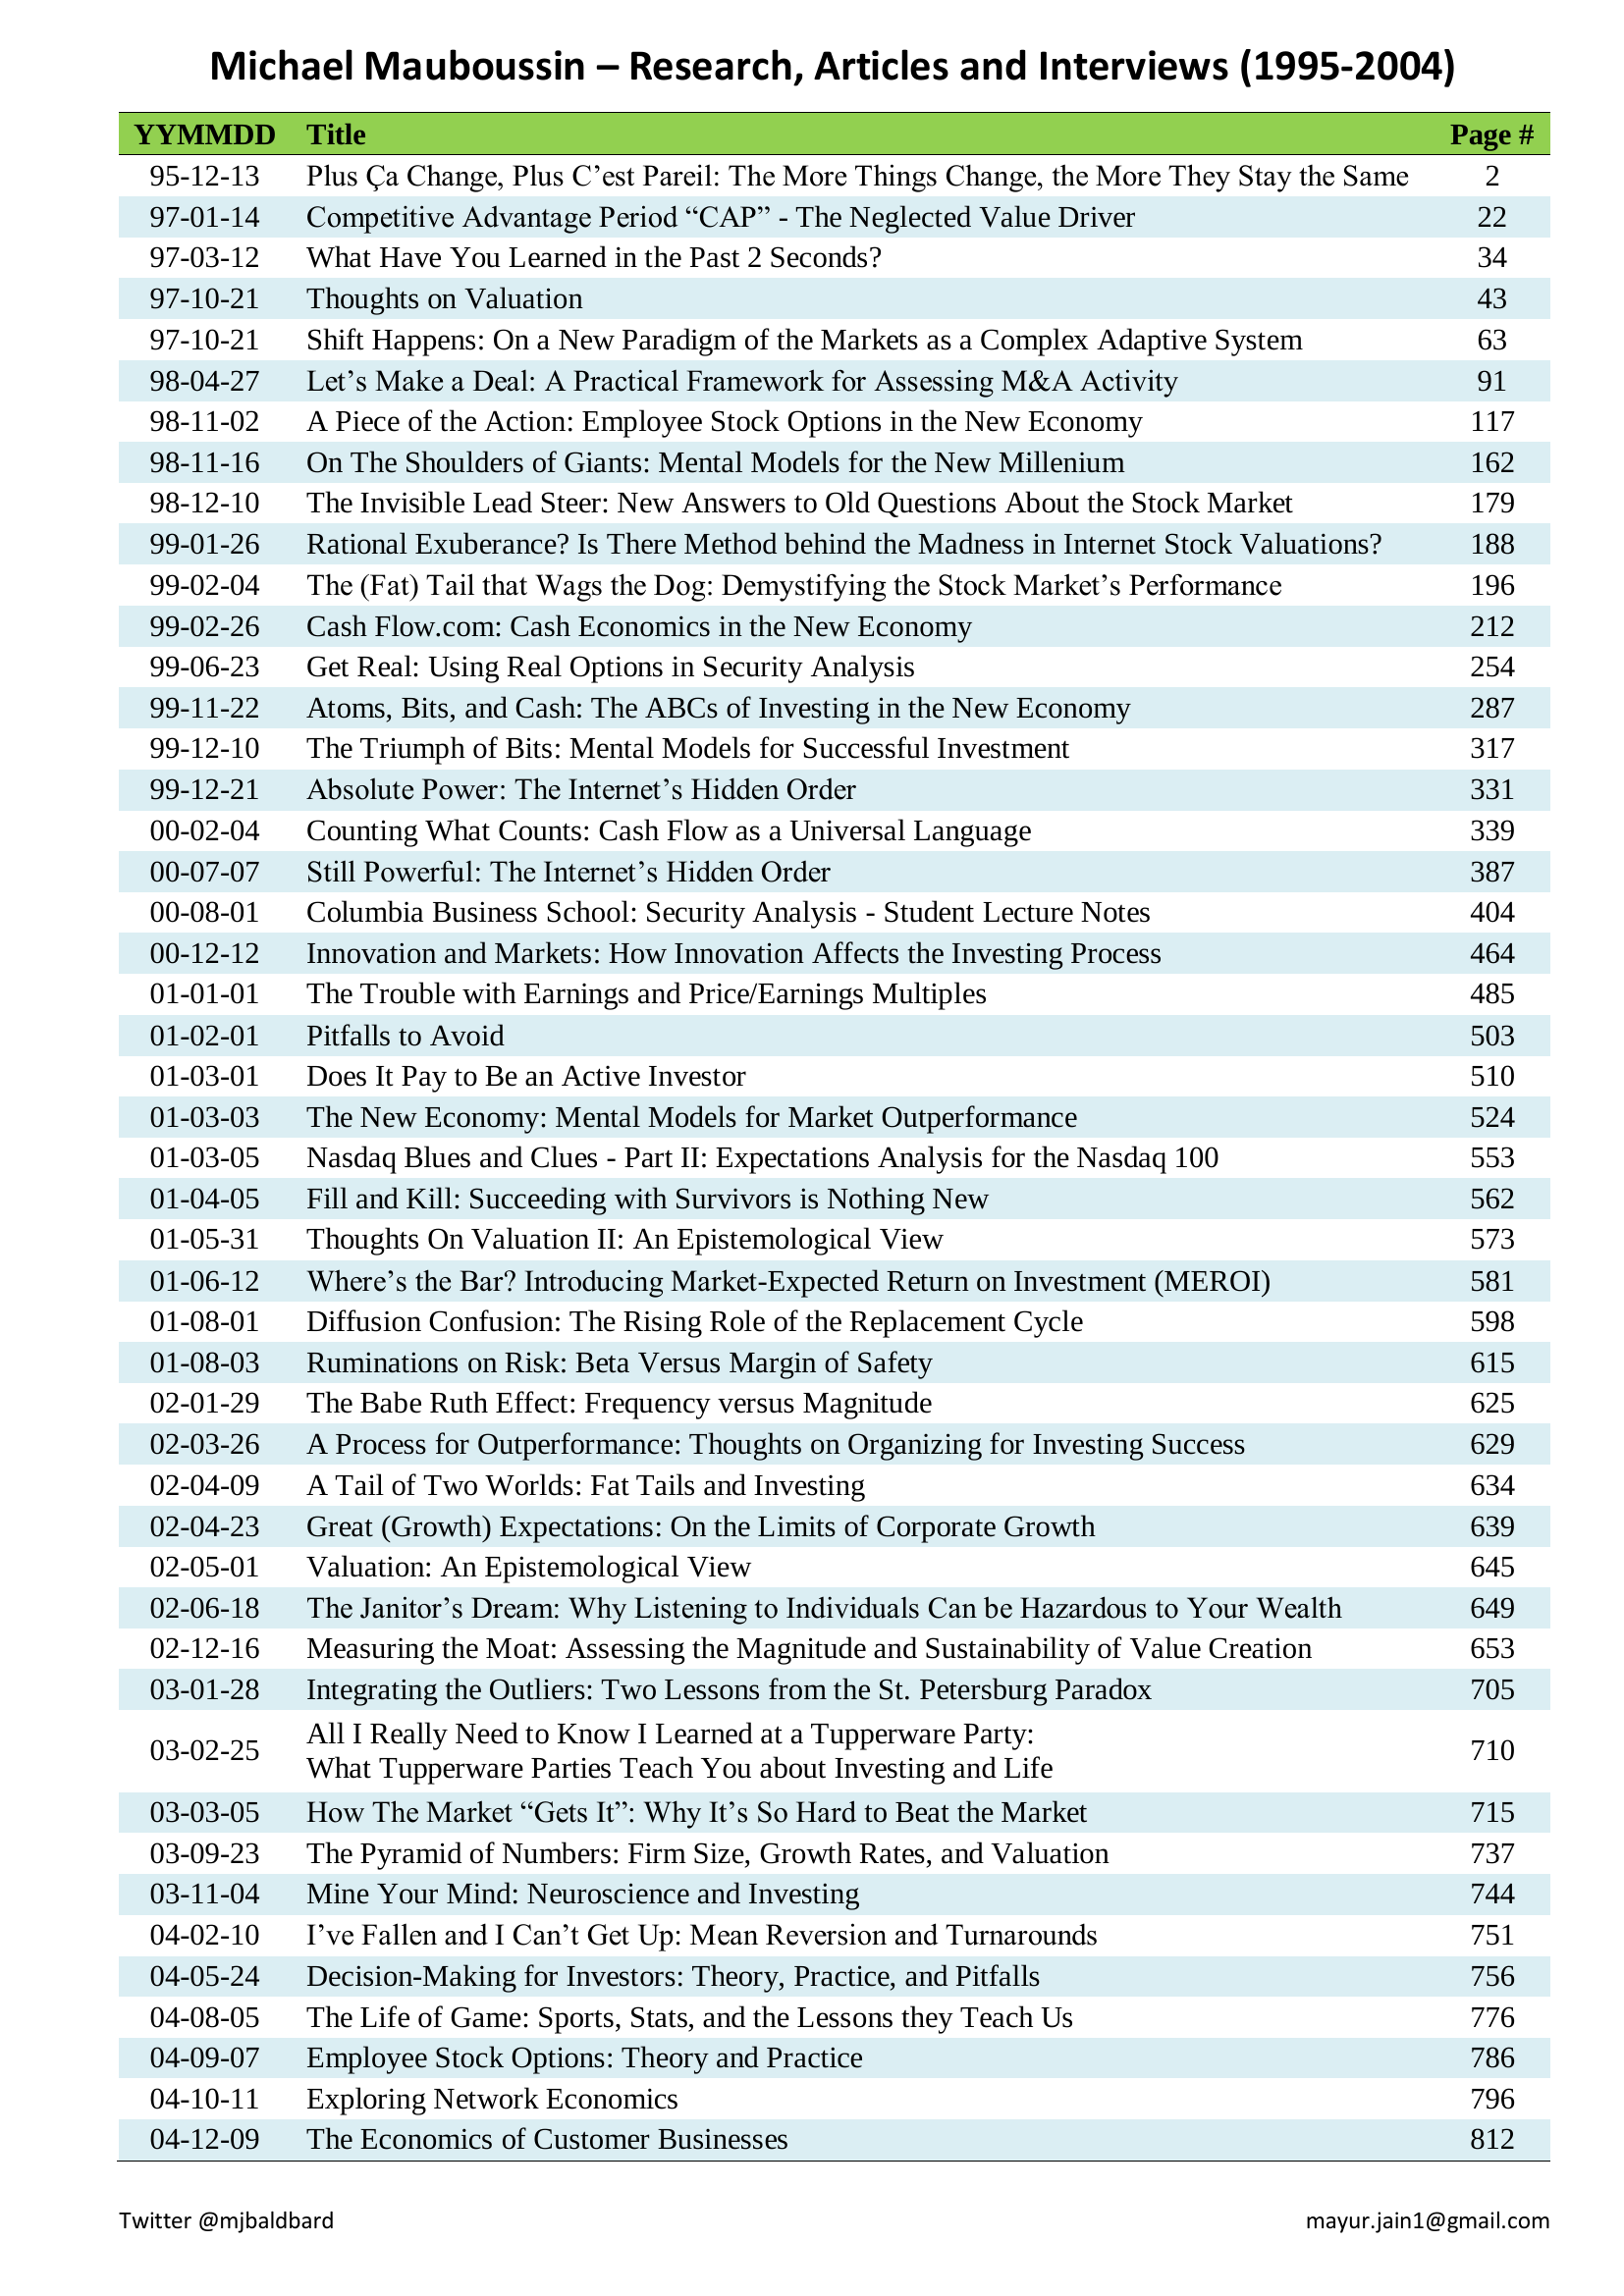

In [30]:
img = docs[0].doc
# Convert image to base64
def image_to_base64(image):
    buffered = BytesIO()
    image.save(buffered, format="PNG")
    img_str = base64.b64encode(buffered.getvalue()).decode('utf-8')
    return img_str

# Convert base64 back to image 
def base64_to_image(base64_string):
    img_data = base64.b64decode(base64_string)
    img = Image.open(BytesIO(img_data))
    return img

# Test the functions
base64_str = image_to_base64(img)
recovered_img = base64_to_image(base64_str)
recovered_img
